### Heurísticas de desempenho de retropropagação

Gráficos para mostrar os resultados extraídos dos três métodos: SGD (Stochastic Gradient Descent), Batch Gradient Descent, e Maximização do Conteúdo de Informação com Dropout. 

1. SGD (Stochastic Gradient Descent)
Modificando o código do SGD para registrar a perda em cada época para que se possa criar um gráfico.

Código para Gráfico de Perda (SGD):

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Gerar dataset de exemplo
np.random.seed(0)
X = np.random.randn(1000, 3)
y = np.random.randn(1000)

# Exibir o dataset
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Target'] = y
print(df.head())


   Feature1  Feature2  Feature3    Target
0  1.764052  0.400157  0.978738  1.593274
1  2.240893  1.867558 -0.977278  0.568722
2  0.950088 -0.151357 -0.103219 -0.114487
3  0.410599  0.144044  1.454274  0.251630
4  0.761038  0.121675  0.443863 -1.210856


### Algoritmo 1: Atualização Sequencial (Stochastic Gradient Descent - SGD)

Utilizando o método de atualização por minilotes (Stochastic Gradient Descent).

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preparar os dados
X_train = X
y_train = y

# Definir o modelo
model_sgd = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(1)
])

# Compilar o modelo usando SGD
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.00001)
model_sgd.compile(optimizer=optimizer_sgd,
                  loss='mean_squared_error')




c:\Users\Carlos Carneiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


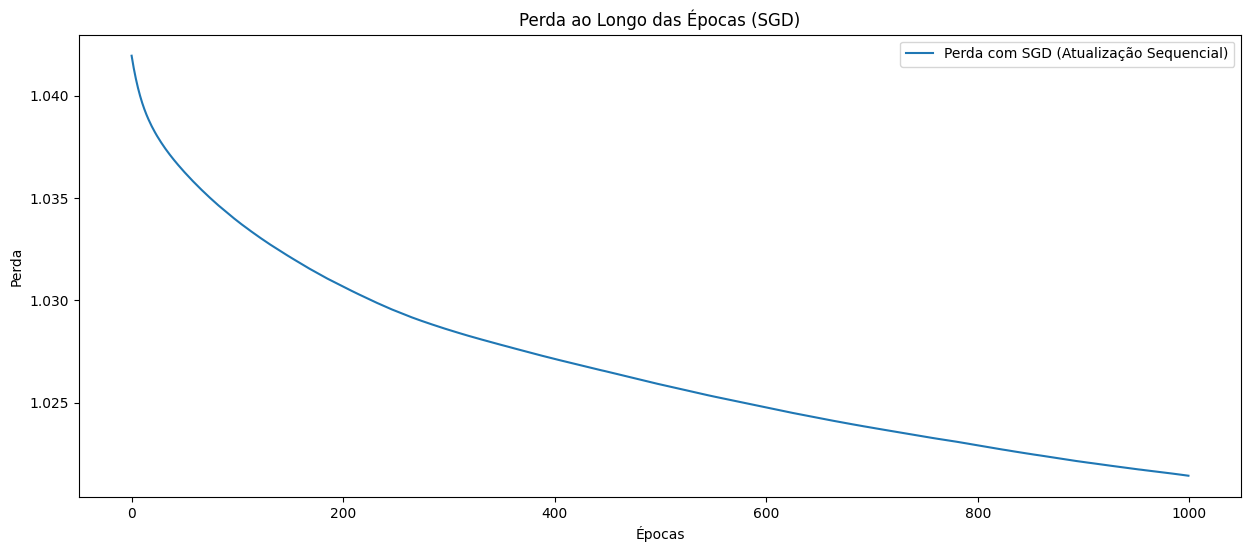

In [4]:
# Treinar o modelo com atualização sequencial (SGD)
history_sgd = model_sgd.fit(X_train, y_train, epochs=1000, batch_size=1, verbose=0)

# Avaliar o modelo
loss_sgd = history_sgd.history['loss']

# Plotar gráfico de perda
plt.figure(figsize=(15, 6))
plt.plot(loss_sgd, label='Perda com SGD (Atualização Sequencial)')
plt.title('Perda ao Longo das Épocas (SGD)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


### 2. Batch Gradient Descent - atualização por lote
Código de Batch Gradient Descent para também registrar a perda em cada época. Os pesos são atualizados após computar os gradientes de todos os exemplos no conjunto de treinamento. Isso tende a produzir atualizações mais estáveis, mas pode ser computacionalmente intensivo para grandes datasets.


**Código Modificado para Gráfico de Perda (Batch Gradient Descent)**

In [5]:
# Definir o modelo
model_batch = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(1)
])

# Compilar o modelo usando SGD
optimizer_batch = tf.keras.optimizers.SGD(learning_rate=0.00001)
model_batch.compile(optimizer=optimizer_batch,
                    loss='mean_squared_error')

In [6]:
# Treinar o modelo com atualização por lote
history_batch = model_batch.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

# Avaliar o modelo
loss_batch = history_batch.history['loss']

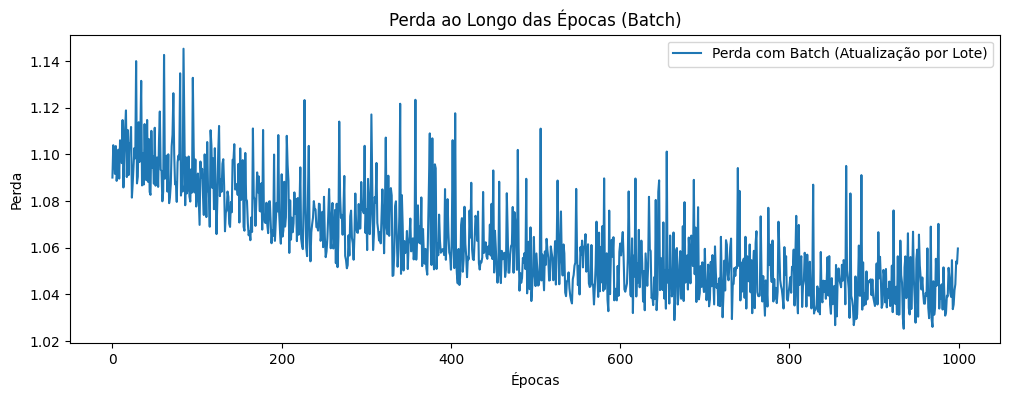

In [7]:
# Plotar gráfico de perda
plt.figure(figsize=(12, 4))
plt.plot(loss_batch, label='Perda com Batch (Atualização por Lote)')
plt.title('Perda ao Longo das Épocas (Batch)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

### 3. Maximização do Conteúdo de Informação com Dropout

- Modelo de rede neural em Keras para treinar com e sem Dropout, e então plotar a curva de perda e acurácia. Maximizar o conteúdo de informação envolve otimizar a rede para extrair características mais ricas e discriminativas dos dados. Um exemplo prático disso é o uso de Dropout durante o treinamento para prevenir o overfitting e aumentar a robustez das características aprendidas.

**Código Modificado para Gráficos de Perda e Acurácia (Dropout)**

In [8]:
# Definir o modelo com Dropout
model_dropout = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dropout(0.5),
    layers.Dense(1)
])

# Compilar o modelo usando SGD
optimizer_dropout = tf.keras.optimizers.SGD(learning_rate=0.00001)
model_dropout.compile(optimizer=optimizer_dropout,
                      loss='mean_squared_error')

In [9]:
# Treinar o modelo com Dropout
history_dropout = model_dropout.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

# Avaliar o modelo
loss_dropout = history_dropout.history['loss']

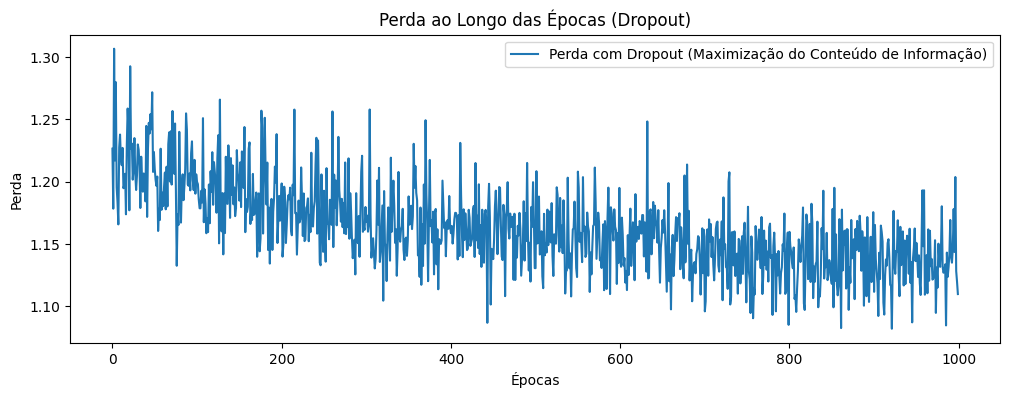

In [10]:
# Plotar gráfico de perda
plt.figure(figsize=(12, 4))
plt.plot(loss_dropout, label='Perda com Dropout (Maximização do Conteúdo de Informação)')
plt.title('Perda ao Longo das Épocas (Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

- Resumo:
    - SGD (Atualização Sequencial): Atualiza os pesos após cada exemplo, útil para grandes datasets, mas pode ter alta variância.
    - Batch Gradient Descent (Atualização por Lote): Atualiza os pesos após computar o gradiente de todo o lote, é mais estável, mas requer mais memória e tempo.
    - Maximização do Conteúdo de Informação: Usando técnicas como Dropout, melhora a generalização do modelo ao forçá-lo a aprender representações mais robustas dos dados.


Esses três métodos ilustram diferentes abordagens para melhorar o desempenho de redes neurais no treinamento, seja otimizando a eficiência da atualização de pesos ou melhorando a capacidade de generalização do modelo.


1. Atualização por Minilotes (SGD)
SGD (Stochastic Gradient Descent) com minilotes combina os benefícios de uma atualização sequencial e por lote:

Estocasticidade: A atualização a cada minilote, em vez de a cada exemplo individual, ainda mantém um nível de estocasticidade, que pode ajudar o modelo a escapar de mínimos locais ruins.
Eficiência Computacional: Usar minilotes melhora a eficiência computacional em comparação com a atualização por exemplo individual, reduzindo o custo por iteração.
Estabilidade e Convergência: Minilotes proporcionam uma média das estimativas do gradiente, resultando em uma atualização mais estável em comparação com atualizações sequenciais puras. Isso reduz a variação e pode levar a uma convergência mais suave e mais rápida.

2. Atualização por Lote (Batch Gradient Descent)
Atualização por Lote usa o conjunto completo de dados para calcular o gradiente:

Computacionalmente Intenso: Pode ser mais eficiente em termos de memória e computação, mas o cálculo do gradiente sobre todo o conjunto de dados a cada iteração pode ser mais lento e menos flexível.
Menos Variabilidade: Menos estocástico, o que pode resultar em uma menor capacidade de escapar de mínimos locais e pode levar a uma convergência mais lenta em alguns casos.

3. Maximização do Conteúdo de Informação (Dropout)
Dropout é uma técnica de regularização que ajuda a prevenir overfitting:

Regularização: Adiciona ruído ao treinamento para melhorar a generalização. Em alguns casos, pode levar a um treinamento mais instável, especialmente se o modelo não for bem ajustado para o dropout (excesso de dropout pode fazer com que o modelo não aprenda bem).
Oscilações: A oscilação aguda que você observou pode ser resultado de uma regularização excessiva, que pode impedir o modelo de encontrar um caminho estável durante o treinamento.
Comparando os Métodos
Aqui estão algumas razões específicas pelas quais o SGD com minilotes pode ter se saído melhor no seu caso:

Taxa de Aprendizado: SGD com minilotes pode aproveitar melhor uma taxa de aprendizado muito baixa, já que o gradiente é calculado com base em um subconjunto dos dados, permitindo uma atualização mais frequente e eficiente.
Estabilidade: A atualização por minilotes oferece um equilíbrio entre a variabilidade e a estabilidade das atualizações dos gradientes. Isso pode resultar em uma convergência mais suave em comparação com atualizações por lote ou com técnicas de regularização que podem introduzir variabilidade adicional.